# Car Price Prediction Using Multiple Linear Regression

# Install Libraries

In [169]:
%pip install pandas
%pip install numpy 
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import Data

In [171]:
df = pd.read_csv("C:/Users/Fitra/Documents/MLR CAR PRICE PREDICTION/dataset/toyota.csv")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


# 2. Data Understanding

In [172]:
df['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [174]:
df.shape

(6738, 9)

# 3. Cleaning Data

In [175]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [176]:
df.duplicated().sum()

39

In [177]:
df = df.drop_duplicates()

In [178]:
df.shape

(6699, 9)

In [179]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print(numeric_df.head())

   year  price  mileage  tax   mpg  engineSize
0  2016  16000    24089  265  36.2         2.0
1  2017  15995    18615  145  36.2         2.0
2  2015  13998    27469  265  36.2         2.0
3  2017  18998    14736  150  36.2         2.0
4  2017  17498    36284  145  36.2         2.0


# 4. Exploratory Data Analyst

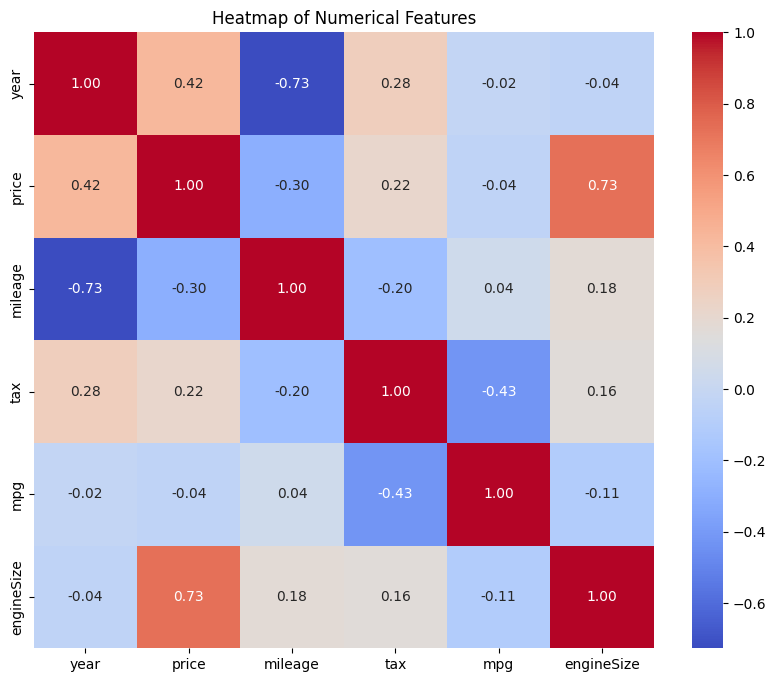

In [180]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Numerical Features")
plt.show()

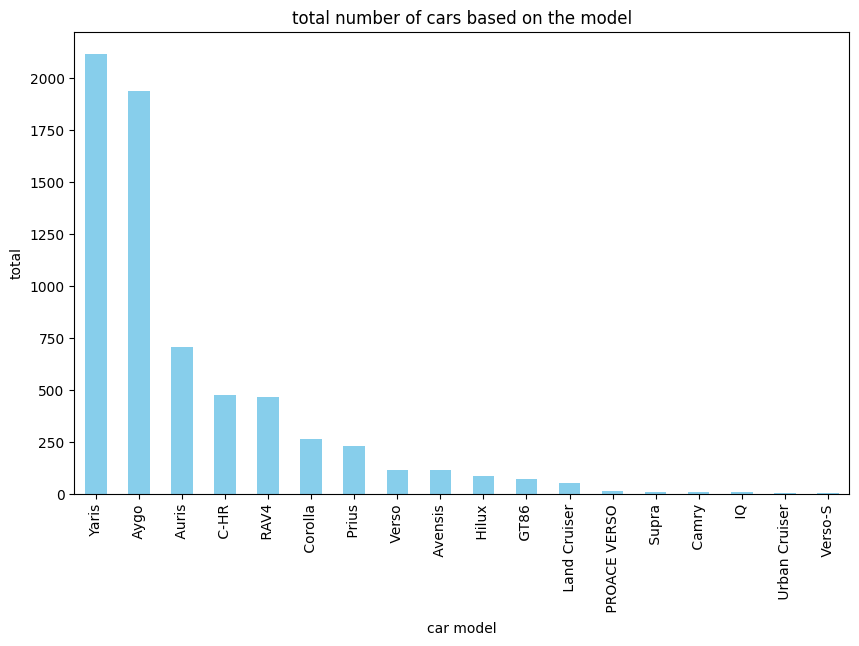

In [181]:
total_car = df ['model'].value_counts()

plt.figure(figsize=(10, 6))
total_car.plot(kind='bar', color='skyblue')
plt.xlabel('car model')
plt.ylabel('total')
plt.title('total number of cars based on the model')
plt.show()

C:\Users\Fitra\AppData\Local\Temp\ipykernel_23048\1203877565.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

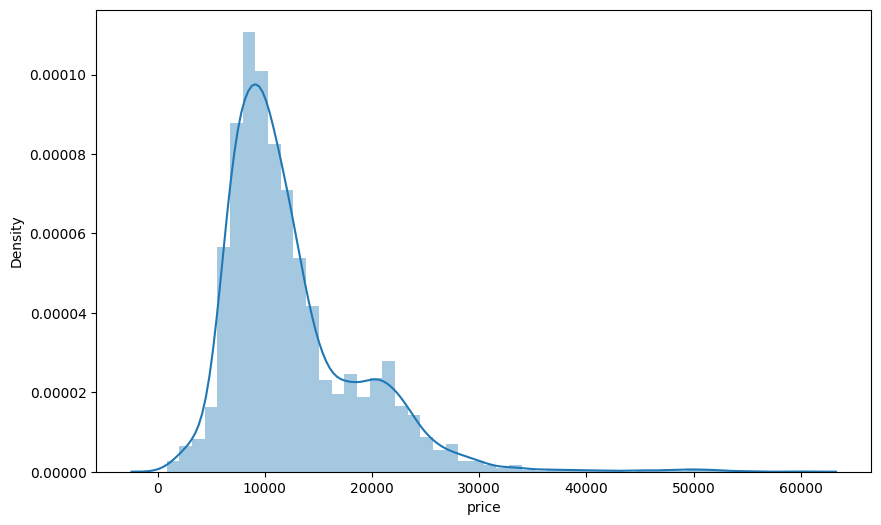

In [182]:
plt.figure(figsize=(10, 6))
sns.distplot(df['price'])

In [183]:
euro_to_rupiah_exchange_rate = 16974
df['price'] = df['price'] * euro_to_rupiah_exchange_rate
df['tax'] = df['tax'] * euro_to_rupiah_exchange_rate


C:\Users\Fitra\AppData\Local\Temp\ipykernel_23048\2028098737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'] * euro_to_rupiah_exchange_rate
C:\Users\Fitra\AppData\Local\Temp\ipykernel_23048\2028098737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax'] = df['tax'] * euro_to_rupiah_exchange_rate


In [184]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6705,Supra,2019,848530260,Semi-Auto,3000,Petrol,2461230,34.5,3.0
6666,Land Cruiser,2019,695849130,Semi-Auto,11404,Diesel,2461230,30.1,2.8
3431,Auris,2013,100129626,Manual,41000,Petrol,2121750,51.4,1.3
6368,Avensis,2015,153869310,Manual,42238,Diesel,509220,62.8,2.0
2855,Yaris,2016,179924400,Automatic,22931,Hybrid,0,86.0,1.5


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6699 non-null   object 
 1   year          6699 non-null   int64  
 2   price         6699 non-null   int64  
 3   transmission  6699 non-null   object 
 4   mileage       6699 non-null   int64  
 5   fuelType      6699 non-null   object 
 6   tax           6699 non-null   int64  
 7   mpg           6699 non-null   float64
 8   engineSize    6699 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 523.4+ KB


# 5. Label Encoder 

In [186]:
from sklearn.preprocessing import LabelEncoder
m_encoder = LabelEncoder()
t_encoder = LabelEncoder()
f_encoder = LabelEncoder()

df['model'] = m_encoder.fit_transform(df['model'])
df['transmission'] = t_encoder.fit_transform(df['transmission'])
df['fuelType'] = f_encoder.fit_transform(df['fuelType'])

C:\Users\Fitra\AppData\Local\Temp\ipykernel_23048\1690333747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = m_encoder.fit_transform(df['model'])
C:\Users\Fitra\AppData\Local\Temp\ipykernel_23048\1690333747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transmission'] = t_encoder.fit_transform(df['transmission'])
C:\Users\Fitra\AppData\Local\Temp\ipykernel_23048\1690333747.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [187]:
df.sample(5)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
841,17,2017,174798252,1,12090,3,2461230,58.9,1.5
2716,17,2016,173983500,0,6000,3,509220,58.0,1.3
4845,2,2017,133245900,1,10523,3,0,69.0,1.0
2420,17,2014,101759130,1,41515,3,0,66.0,1.0
4872,2,2019,191721330,1,6680,3,2461230,56.5,1.0


# 6. Preparation Data

In [188]:
features = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((6699, 8), (6699,))

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test.shape

(1340,)

# 7. Training & Evaluation Data

In [190]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [191]:
score = lr.score(X_test, y_test)
print("accuracy Linear Regression model :", score)

accuracy Linear Regression model : 0.7909694669627105


In [192]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 35137626.152063556
MSE: 2493220004614690.5
RMSE: 49932154.0153706


# 8. Testing

In [193]:
input_data = {
    'model' : ' Urban Cruiser',
    'year' : 2011,
    'transmission' : 'Manual',
    'mileage' : 45128,
    'fuelType' : 'Petrol',
    'tax' : 2385180,
    'mpg' : 50.4,
    'engineSize' : 1.3
}

features = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']

input_df = pd.DataFrame([input_data])

input_df['model'] = m_encoder.transform(input_df['model'])
input_df['transmission'] = t_encoder.transform(input_df['transmission'])
input_df['fuelType'] = f_encoder.transform(input_df['fuelType'])

model_counts = df['model'].nunique() 
print("cars model :", model_counts)

input_df                                    

cars model : 18


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,14,2011,1,45128,3,2385180,50.4,1.3


In [194]:
prediction = lr.predict(input_df)
prediction_formatted = round(prediction[0], 2)

print("car price estimation : Rp.", prediction_formatted)

car price estimation : Rp. 50292922.82
